<a href="https://colab.research.google.com/github/ovindumandith/IEEE_day1/blob/main/myPreProcessing1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting drive to access the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the relavant extensions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
import os
import scipy.optimize as opt
from sklearn import preprocessing

path = "/content/drive/MyDrive/FDM_MiniProject/housepricing.csv"
df_perth0 = pd.read_csv(path)
df_perth0.columns


Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [3]:
#Vizualizing how many rows and columns are there
df_perth0.shape

(33656, 19)

In [4]:
line_colors = ["#7CEA9C", '#50B2C0', "rgb(114, 78, 145)", "hsv(348, 66%, 90%)", "hsl(45, 93%, 58%)"]

import warnings
warnings.filterwarnings("ignore")

heval = True # load heavier load cells visualisation
heval2 = True # load model cells

In [5]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.1 MB/s eta 0:00:00


In [6]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [7]:
#Viewing the data set
df_perth0.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [11]:
df_num,df_cat = transformer(select_dtype=True).transform(X=df_perth0.copy())
df_num[['SOLD_MONTH', 'SOLD_YEAR']] = df_cat['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
df_cat.drop(['DATE_SOLD'],axis=1,inplace=True)
df_EDA = pd.concat([df_num,df_cat],axis=1) # combine
df_cat.columns

Index(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH'], dtype='object')

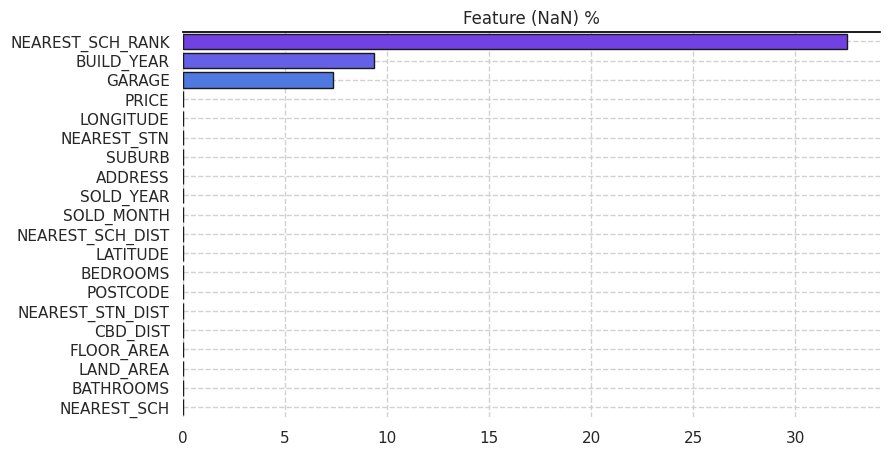

In [12]:
transformer(show_nan=True,figsize=(9,5),title='Feature (NaN) %').transform(X=df_EDA)


In [13]:
#find null values to every column
df_perth0.isnull().sum()  #finding null values

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [14]:
#delete number of missing observations
df_perth0.dropna(axis=0,inplace=True)
df_perth0.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0


In [15]:
#replacing the missing values with most frequent value
df_perth0=df_perth0.fillna(df_perth0.mode().iloc[0])
df_perth0.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0


In [16]:
#delete misssing values
df_perth0.dropna(axis=1,inplace=True)
df_perth0.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0


In [17]:
#After cleaning
df_perth0.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [18]:
#After Cleaning
df_perth0.shape

(19208, 19)

In [19]:
print(df_perth0)

                    ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
1               1 Addis Way            Wandi   365000         3          2   
2           1 Ainsley Court          Camillo   287000         3          1   
9          1 Arundel Street        Bayswater   685000         3          2   
11           1 Ashcott Gate           Butler   367500         3          2   
13     1 Ashendon Boulevard     Hammond Park   535000         4          2   
...                     ...              ...      ...       ...        ...   
33646       9B North Street       Swanbourne  1700000         4          3   
33648   9B Teocote Crescent      Aubin Grove   423000         3          2   
33649       9B Viveash Road      Middle Swan   467000         4          2   
33650      9b Wesley Street  South Fremantle   955000         3          2   
33651        9C Gold Street  South Fremantle  1040000         4          3   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
1

In [ ]:
import pandas as pd

# Assuming you have already loaded or created df_perth0
df_perth0.to_csv('df_perth0.csv', index=False)


In [20]:
df_perth0.drop(["ADDRESS","CBD_DIST","NEAREST_STN" ,"NEAREST_STN_DIST","POSTCODE","LATITUDE","LONGITUDE","NEAREST_SCH","NEAREST_SCH_DIST","NEAREST_SCH_RANK"], axis=1, inplace=True)

In [21]:
print(df_perth0)

                SUBURB    PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  \
1                Wandi   365000         3          2     2.0        351   
2              Camillo   287000         3          1     1.0        719   
9            Bayswater   685000         3          2     8.0        552   
11              Butler   367500         3          2     2.0        398   
13        Hammond Park   535000         4          2     4.0        704   
...                ...      ...       ...        ...     ...        ...   
33646       Swanbourne  1700000         4          3     4.0        414   
33648      Aubin Grove   423000         3          2     2.0        248   
33649      Middle Swan   467000         4          2     2.0        400   
33650  South Fremantle   955000         3          2     1.0        200   
33651  South Fremantle  1040000         4          3     2.0        292   

       FLOOR_AREA  BUILD_YEAR  DATE_SOLD  
1             139      2013.0  02-2019\r  
2            

In [22]:
# Specify the file path and name for the Excel file
excel_file_path = "/content/drive/MyDrive/FDM_MiniProject/cleared2.xlsx"  # Replace with the desired file path and name

# Use the to_excel method to save the DataFrame to an Excel file
df_perth0.to_excel(excel_file_path, index=False)  # Set index=False to exclude the index column


In [24]:
#FINDING NO.OF HOUSES IN EACH ADDRESS/DROPPED
#column_name1 = 'ADDRESS'

# Use value_counts() to count occurrences of each category
#category_counts1 = df_perth0[column_name1].value_counts()

# Print the category counts
#print(category_counts1)




In [25]:
#BEDROOMS
column_name2 = 'BEDROOMS'

category_counts2 = df_perth0[column_name2].value_counts()

print(category_counts2)



4     10053
3      6582
5      1550
2       758
6       172
1        53
7        25
8        11
9         3
10        1
Name: BEDROOMS, dtype: int64


In [26]:
#BATHROOMS
column_name3 = 'BATHROOMS'

category_counts3 = df_perth0[column_name3].value_counts()

print(category_counts3)



2    12876
1     4595
3     1558
4      160
5       15
6        3
7        1
Name: BATHROOMS, dtype: int64


In [27]:
#GARAGE
column_name4 = 'GARAGE'

category_counts4 = df_perth0[column_name4].value_counts()

print(category_counts4)

2.0     12919
1.0      3174
3.0      1279
4.0      1176
6.0       263
5.0       210
8.0        72
7.0        57
10.0       16
12.0       12
9.0         8
14.0        6
16.0        3
18.0        2
13.0        2
11.0        2
17.0        1
21.0        1
20.0        1
26.0        1
22.0        1
50.0        1
31.0        1
Name: GARAGE, dtype: int64


In [29]:
#The resulting DataFrame df_perth0 now contains only the specified columns,
# and the 'PRICE' column has been converted to integer data type. This can be helpful for further analysis or data processing tasks.
#since we target predicitiing the price

df_perth0=df_perth0[['PRICE','BEDROOMS', 'BATHROOMS', 'GARAGE','LAND_AREA', 'FLOOR_AREA', 'DATE_SOLD','BUILD_YEAR']]
df_perth0['PRICE']=df_perth0['PRICE'].astype('int')
df_perth0.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,DATE_SOLD,BUILD_YEAR
1,365000,3,2,2.0,351,139,02-2019\r,2013.0
2,287000,3,1,1.0,719,86,06-2015\r,1979.0
9,685000,3,2,8.0,552,126,10-2019\r,1999.0
11,367500,3,2,2.0,398,158,11-2018\r,2003.0
13,535000,4,2,4.0,704,247,07-2019\r,2002.0


# **Summary about the dataFrame**
The number of non-null values in each column and
The data type of each column and
The memory usage of the DataFrame.

In [30]:
#his method provides a summary of the DataFrame's structure and content, including data types, non-null counts, and memory usage.
df_perth0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19208 entries, 1 to 33651
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRICE       19208 non-null  int64  
 1   BEDROOMS    19208 non-null  int64  
 2   BATHROOMS   19208 non-null  int64  
 3   GARAGE      19208 non-null  float64
 4   LAND_AREA   19208 non-null  int64  
 5   FLOOR_AREA  19208 non-null  int64  
 6   DATE_SOLD   19208 non-null  object 
 7   BUILD_YEAR  19208 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [31]:
# It provides summary statistics for numeric columns, including count, mean, standard deviation,
#minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values
df_perth0.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
count,1.920800e+04,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,6.998658e+05,3.676020,1.861776,2.183205,2441.914879,187.532330,1988.922741
std,3.872944e+05,0.750726,0.587704,1.221165,18446.099139,72.985315,21.907656
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000
25%,4.380000e+05,3.000000,2.000000,2.000000,494.000000,134.000000,1977.000000
50%,5.850000e+05,4.000000,2.000000,2.000000,675.000000,177.000000,1995.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,809.000000,228.000000,2005.000000
max,2.440000e+06,10.000000,7.000000,50.000000,999999.000000,849.000000,2017.000000


Backend code to initiate

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import shap
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.feature_selection import SelectKBest,f_regression
from xgboost import plot_importance,XGBClassifier,XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

# Notebook Helper Class
class transformer(BaseEstimator,TransformerMixin):

    def __init__(self,drop_nan=False,select_dtype=False,show_nan=False,title='Title',show_counts=False,
                 figsize=(None,None), feature_importance = False, target = 'PRICE'):

        self.drop_nan = drop_nan
        self.select_dtype = select_dtype
        self.show_nan = show_nan
        self.title = title
        self.show_counts = show_counts
        self.figsize = figsize
        self.feature_importance = feature_importance
        self.target = target  # target variable

    # Apply Fit
    def fit(self,X,y=None):
        return self

    # Apply Some Transformation to the Feature Matrix
    def transform(self,X):

        '''show NaN % in DataFrame'''
        if(self.show_nan):

            fig, ax = plt.subplots(figsize = self.figsize)
            nan_val = (X.isnull().sum()/len(X)*100).sort_values(ascending = False)
            cmap = sns.color_palette("plasma")
            for i in ['top', 'right', 'bottom', 'left']:
                ax.spines[i].set_color('black')
            ax.spines['top'].set_visible(True);ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False)
            sns.barplot(x=nan_val,y=nan_val.index, edgecolor='k',palette = 'rainbow')
            plt.title(self.title);ax.grid(ls='--',alpha = 0.9);plt.show()
            return

        ''' Plot df.value_counts '''
        if(self.show_counts):

            tdf = X.value_counts()
            cmap = sns.color_palette("plasma")
            fig, ax = plt.subplots(figsize = self.figsize)
            for i in ['top', 'right', 'bottom', 'left']:
                ax.spines[i].set_color('black')
            ax.spines['top'].set_visible(True);ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False)
            sns.barplot(tdf.index,tdf.values,edgecolor='k',palette = 'rainbow',ax=ax);
            plt.title(self.title);ax.grid(ls='--',alpha = 0.9);plt.show()

        ''' Drop All NAN values in DataFrame'''
        if(self.drop_nan):
            X = X.dropna();
            return X

        ''' Split DataFrame into Numerical/Object features'''
        if(self.select_dtype):
            X1 = X.select_dtypes(include=['float64','int64','uint8'])     # return only numerical features from df
            X2 = X.select_dtypes(exclude=['float64','int64','uint8'])
            return X1,X2

        ''' Plot Feature Importance '''
        if(self.feature_importance):

             # Plot Correlation to Target Variable only
            def corrMat2(df,target=self.target,figsize=(9,0.5),ret_id=False):

                corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
                corr_mat = corr_mat.transpose()
                corr = corr_mat.loc[:, df.columns == self.target].transpose().copy()

                if(ret_id is False):
                    f, ax = plt.subplots(figsize=figsize)
                    sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0,
                                cmap=cmap,square=False,lw=2,annot=True,cbar=False)
                    plt.title(f'Feature Correlation to {self.target}')

                if(ret_id):
                    return corr

            ''' Plot Relative Feature Importance '''
            def feature_importance(tldf,feature=self.target,n_est=500):

                # X : Numerical / Object DataFrame
                ldf0,_ = transformer(select_dtype=True).transform(X=tldf)
                ldf = transformer(drop_nan=True).transform(X=ldf0)

                # Input dataframe containing feature & target variable
                X = ldf.copy()
                y = ldf[feature].copy()
                del X[feature]

            #   CORRELATION
                imp = corrMat2(ldf,feature,figsize=(15,0.5),ret_id=True)
                del imp[feature]
                s1 = imp.squeeze(axis=0);s1 = abs(s1)
                s1.name = 'Correlation'

            #   SHAP
                model = CatBoostRegressor(silent=True,n_estimators=n_est).fit(X,y)
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X)
                shap_sum = np.abs(shap_values).mean(axis=0)
                s2 = pd.Series(shap_sum,index=X.columns,name='Cat_SHAP').T

            #   RANDOMFOREST
                model = RandomForestRegressor(n_est,random_state=0, n_jobs=-1)
                fit = model.fit(X,y)
                rf_fi = pd.DataFrame(model.feature_importances_,index=X.columns,
                                    columns=['RandForest']).sort_values('RandForest',ascending=False)
                s3 = rf_fi.T.squeeze(axis=0)

            #   XGB
                model=XGBRegressor(n_estimators=n_est,learning_rate=0.5,verbosity = 0)
                model.fit(X,y)
                data = model.feature_importances_
                s4 = pd.Series(data,index=X.columns,name='XGB').T

            #   KBEST
                model = SelectKBest(k=X.shape[1], score_func=f_regression)
                fit = model.fit(X,y)
                data = fit.scores_
                s5 = pd.Series(data,index=X.columns,name='K_best')

                # Combine Scores
                df0 = pd.concat([s1,s2,s3,s4,s5],axis=1)
                df0.rename(columns={'target':'lin corr'})

                x = df0.values
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(x)
                df = pd.DataFrame(x_scaled,index=df0.index,columns=df0.columns)
                df = df.rename_axis('Feature Importance via', axis=1)
                df = df.rename_axis('Feature', axis=0)
                df['total'] = df.sum(axis=1)
                df = df.sort_values(by='total',ascending=True)
                del df['total']
                fig = px.bar(df,orientation='h',barmode='stack',color_discrete_sequence=line_colors)
                fig.update_layout(template='plotly_white',height=self.figsize[1],width=self.figsize[0],margin={"r":0,"t":60,"l":0,"b":0});
                for data in fig.data:
                    data["width"] = 0.6 #Change this value for bar widths
                fig.show()

            feature_importance(X)

# Class to Visualise Things Only
class visualise(BaseEstimator,TransformerMixin):

    def __init__(self,target=None,option=False):

        self.target = target             # target varable [str]
        self.option = option

    @staticmethod
    def corrMat2(df,target='demand',figsize=(9,0.5),ret_id=False):

        corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
        corr_mat = corr_mat.transpose()
        corr = corr_mat.loc[:, df.columns == target].transpose().copy()

        if(ret_id is False):
            f, ax = plt.subplots(figsize=figsize)
            sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0,
                         cmap=cmap,square=False,lw=2,annot=True,cbar=False)
            plt.title(f'Feature Correlation to {target}')

        if(ret_id):
            return corr

    def fit(self):
        return self

    # X -> Numerical (feature matrix + target variable)
    def transform(self,X):

        # Pandas Static Histogram
        if(self.option is 'histogram'):
            vdf_perth1_num,_ = transformer(select_dtype=True).transform(X=X)
            vdf_perth1_num.hist(bins=30, figsize=(20,15));plt.show()

        # Seaborn Static Boxplot
        if(self.option is 'boxplot'):

            lX,_ = transformer(select_dtype=True).transform(X=X)
            fig,axs = plt.subplots(ncols=5,nrows=4,figsize=(900,400))
            index = 0
            axs = axs.flatten()
            for k,v in lX.items():
                flierprops = dict(marker='o',mfc='k',ls='none',mec='k')
                ax = sns.boxplot(x=k,data=lX,orient='h',flierprops=flierprops,
                                ax=axs[index],width=0.5)
                index += 1
            plt.tight_layout();plt.show()

        # Outlier Quantile Information
        if(self.option is 'outliers'):

    #       2. Define Outliers
            lX,_ = transformer(select_dtype=True).transform(X=X)
            for k, v in lX.items():
                q1 = v.quantile(0.25); q3 = v.quantile(0.75); irq = q3 - q1
                v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
                perc = np.shape(v_col)[0] * 100.0 / np.shape(lX)[0]
                print("Column %s outliers = %.2f%%" % (k, perc))

 creating geographical choropleth plots using Plotly and GeoPandas

In [9]:
import geopandas as gpd

''' Plotly Geography Choropeth Plots /w Menu Layout '''
def plot_geo_menu(ldf,feature):

    print(ldf.info())

    # Load Geometry File
    wa_gdf = gpd.read_file('/kaggle/input/wa-gda2020/WA_LOCALITY_POLYGON_SHP-GDA2020.shp')    # Load the data using
    wa_gdf.drop(['POSTCODE','PRIM_PCODE','LOCCL_CODE','DT_GAZETD','STATE_PID','DT_RETIRE','DT_CREATE','LOC_PID'],axis=1,inplace=True)

    # Display Values
    wa_gdf.index = wa_gdf['NAME']
    median_price = ldf.groupby(['SUBURB']).median()      # Suburb Median Groupby
    median_price.index = median_price.index.str.upper()
    df_merged = wa_gdf.join(median_price).dropna()
#     df_merged = wa_gdf.join(median_price)

    # Convert geometry to GeoJSON
    df_merged = df_merged.to_crs(epsg=4327)
    lga_json = df_merged.__geo_interface__

    # Unique Token ID
    MAPBOX_ACCESSTOKEN = 'pk.eyJ1Ijoic2h0cmF1c3NhcnQiLCJhIjoiY2tqcDU2dW56MDVkNjJ6angydDF3NXVvbyJ9.nx2c5XzUH9MwIv4KcWVGLA'
#     lst_val = [df_merged[feature].min(),df_merged[feature].max()]

    trace = []
    # Set the data for the map
    for i in feature:
        trace.append(go.Choroplethmapbox(geojson = lga_json,locations = df_merged.index,
                               z = df_merged[i].values,
                               text = df_merged.index,
                               hovertemplate = "<b>%{text}</b><br>" +
                                                "%{z}<br>" +
                                                "<extra></extra>",
                               colorbar=dict(thickness=10, ticklen=3,outlinewidth=0),
                               marker_line_width=1, marker_opacity=0.8, colorscale="turbo",
                               visible=False)
                        )
    trace[0]['visible'] = True

    layout = go.Layout(mapbox1 = dict(domain = {'x': [0, 1],'y': [0, 1]},
                                      center = dict(lat=-31.95, lon=115.8),
                       accesstoken = MAPBOX_ACCESSTOKEN,zoom = 8),
                       autosize=True,height=500)

    lst = [];ii=-1
    for i in feature:
        ii+=1
        tlist = [False for z in range(len(feature))]
        tlist[ii] = True
        temp = dict(args=['visible',tlist],label=i,method='restyle')
        lst.append(temp)

    # add a dropdown menu in the layout
    layout.update(updatemenus=list([dict(x=0.8,y=1.1,xanchor='left',yanchor='middle',buttons=lst)]))
    fig=go.Figure(data=trace, layout=layout)
    fig.update_layout(title_text='Suburb Mean Values', title_x=0.01)
    fig.update_layout(margin={"r":0,"t":80,"l":0,"b":80},mapbox_style="light")
    fig.show()

''' Plotly Geography Choropeth Plots '''
def plot_geo(ldf,feature,title=None,lst_val=None):

    # Load Geometry File
    wa_gdf = gpd.read_file('/kaggle/input/wa-gda2020/WA_LOCALITY_POLYGON_SHP-GDA2020.shp')    # Load the data using
    wa_gdf.drop(['POSTCODE','PRIM_PCODE','LOCCL_CODE','DT_GAZETD','STATE_PID','DT_RETIRE','DT_CREATE','LOC_PID'],axis=1,inplace=True)

    wa_gdf.index = wa_gdf['NAME']
    median_price = ldf.groupby(['SUBURB']).median()
    median_price.index = median_price.index.str.upper()
    df_merged = wa_gdf.join(median_price).dropna() # some perth suburbs don't have data & drop other WA region suburbs to speed up map load

    # Convert geometry to GeoJSON
    df_merged = df_merged.to_crs(epsg=4327)
    lga_json = df_merged.__geo_interface__

    MAPBOX_ACCESSTOKEN = 'pk.eyJ1Ijoic2h0cmF1c3NhcnQiLCJhIjoiY2tqcDU2dW56MDVkNjJ6angydDF3NXVvbyJ9.nx2c5XzUH9MwIv4KcWVGLA'

    if(lst_val is None):
        lst_val = [df_merged[feature].min(),df_merged[feature].max()]

    # Set the data for the map
    data = go.Choroplethmapbox(geojson = lga_json,
                               locations = df_merged.index,
                               z = df_merged[feature],
                               text = title,
                               colorbar=dict(thickness=20, ticklen=3,outlinewidth=0),
                               marker_line_width=1, marker_opacity=0.8, colorscale="viridis",
                               zmin=lst_val[0], zmax=lst_val[1])

    layout = go.Layout(mapbox1 = dict(domain = {'x': [0, 1],'y': [0, 1]},center = dict(lat=-31.95, lon=115.8),
                       accesstoken = MAPBOX_ACCESSTOKEN,zoom = 9),
                       autosize=True,height=650)

    # Generate the map
    fig=go.Figure(data=data, layout=layout)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [32]:

#some data transformations
df_num,df_cat = transformer(select_dtype=True).transform(X=df_perth0.copy())
df_num[['SOLD_MONTH', 'SOLD_YEAR']] = df_cat['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
df_cat.drop(['DATE_SOLD'],axis=1,inplace=True)
df_EDA = pd.concat([df_num,df_cat],axis=1) # combine
df_cat.columns

Index([], dtype='object')

In [10]:
#pre requisites for drawing graphs and boxplots
import plotly.express as px

# Plot Histogram, Boxplot using Plotly
def px_stats(df, n_cols=4, to_plot='box',height=800,w=None):

    ldf,_ = transformer(select_dtype=True).transform(X=df)
    numeric_cols = ldf.columns
    n_rows = -(-len(numeric_cols) // n_cols)  # math.ceil in a fast way, without import
    row_pos, col_pos = 1, 0
    fig = make_subplots(rows=n_rows, cols=n_cols,subplot_titles=numeric_cols.to_list())

    for col in numeric_cols:
        if(to_plot is 'histogram'):
            trace = go.Histogram(x=ldf[col],showlegend=False,autobinx=True,
                                 marker = dict(color = 'rgb(27, 79, 114)',
                                 line=dict(color='white',width=0)))
        else:
            trace = getattr(px, to_plot)(ldf[col],x=ldf[col])["data"][0]

        if col_pos == n_cols:
            row_pos += 1
        col_pos = col_pos + 1 if (col_pos < n_cols) else 1
        fig.add_trace(trace, row=row_pos, col=col_pos)

    fig.update_traces(marker = dict(color = 'rgb(27, 79, 114)',
                     line=dict(color='white',width=0)))
    fig.update_layout(template='plotly_white');fig.update_layout(margin={"r":0,"t":60,"l":0,"b":0})
    fig.update_layout(height=height,width=w);fig.show()

In [33]:
if(heval):
    px_stats(df_EDA, to_plot='histogram')

In [34]:
if(heval):
    px_stats(df_EDA, to_plot='box',height=550)

Evaluate which features have most weight in a model evaluation to get a better understanding of not only their imporance but also how different models use these features in their evaluation to the variable **PRICE**

In [35]:
transformer(feature_importance=True,figsize=(800,400),target='PRICE').transform(X=df_EDA)

**Removing Outliers**

**Data Scaling**

In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Exclude the 1st and 7th columns
columns_to_exclude = ['ADDRESS', 'DATE_SOLD']  # Replace with the actual column names
columns_to_scale = [col for col in df_perth0.columns if col not in columns_to_exclude]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data_scaled = scaler.fit_transform(df_perth0[columns_to_scale])

# Create a DataFrame from the scaled data
data_s = pd.DataFrame(data_scaled, columns=columns_to_scale)

# Calculate statistics on the scaled data
statistics = data_s.describe()

# Print the type of data_s
print('Type of data_s: {}'.format(type(data_s)))

# Print the statistics
print(statistics)



In [ ]:
# Specify the columns to exclude
columns_to_exclude = ['ADDRESS', 'DATE_SOLD']  # Replace with actual column names

# Create a list of columns to include by excluding the specified columns
columns_to_include = [col for col in df_perth0.columns if col not in columns_to_exclude]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data_scaled = scaler.fit_transform(df_perth0[columns_to_include])

# Create a DataFrame from the scaled data with appropriate column names
df_scaled = pd.DataFrame(data_scaled, columns=columns_to_include)

# Calculate statistics on the scaled data
statistics = df_scaled.describe()

# Print the type of df_scaled
print('Type of df_scaled: {}'.format(type(df_scaled)))

# Print the statistics
print(statistics)


In [38]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, init='k-means++')
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

In [39]:
kmeans.inertia_

104323.22687103396

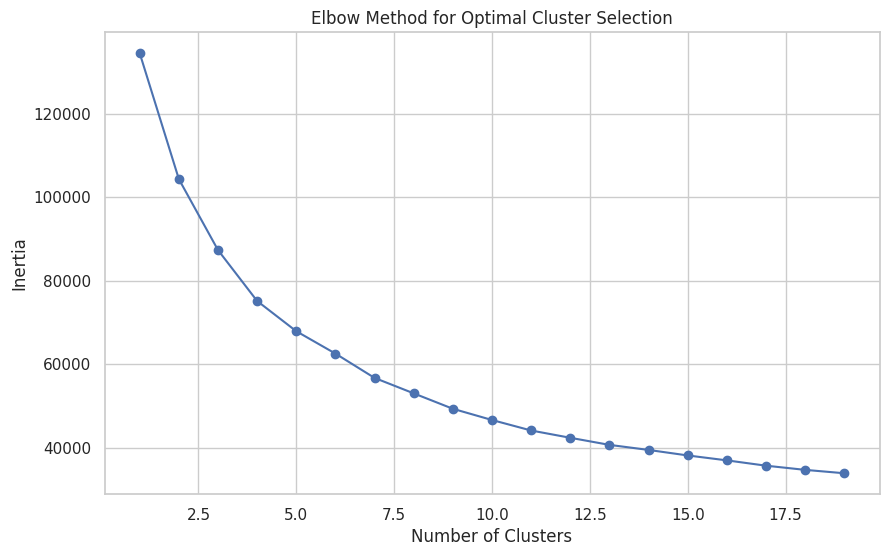

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

SSE = []

for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(10, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.show()


In [41]:
def kmeans_fun(no_cluster, df):
    kmeans = KMeans(n_clusters=no_cluster, init='k-means++')
    kmeans.fit(df)
    pred = kmeans.predict(df)
    cluster_centers = kmeans.cluster_centers_
    return pred, cluster_centers


In [42]:
pred_3, centroid_3 = kmeans_fun(3,df_scaled)
pred_4, centroid_4 = kmeans_fun(4,df_scaled)
pred_5, centroid_5 = kmeans_fun(5,df_scaled)
pred_6, centroid_6 = kmeans_fun(6,df_scaled)
pred_7, centroid_7 = kmeans_fun(7,df_scaled)
pred_8, centroid_8 = kmeans_fun(8,df_scaled)

In [43]:
import numpy as np
#count the number of occurrences of each unique cluster assignment in pred_3
unique, counts = np.unique(pred_3, return_counts=True)
result = np.column_stack((unique, counts))
print(result)


[[    0  5055]
 [    1  3442]
 [    2 10711]]


In [44]:
import numpy as np
#count the number of occurrences of each unique cluster assignment in pred_4
unique, counts = np.unique(pred_4, return_counts=True)
result = np.column_stack((unique, counts))
print(result)


[[    0  3488]
 [    1  5039]
 [    2 10668]
 [    3    13]]


In [45]:
import numpy as np
#count the number of occurrences of each unique cluster assignment in pred_5
unique, counts = np.unique(pred_5, return_counts=True)
result = np.column_stack((unique, counts))
print(result)


[[    0  3265]
 [    1 10443]
 [    2    13]
 [    3  4904]
 [    4   583]]


In [ ]:
import numpy as np
#count the number of occurrences of each unique cluster assignment in pred_6
unique, counts = np.unique(pred_6, return_counts=True)
result = np.column_stack((unique, counts))
print(result)


In [47]:
import numpy as np
#count the number of occurrences of each unique cluster assignment in pred_7
unique, counts = np.unique(pred_7, return_counts=True)
result = np.column_stack((unique, counts))
print(result)


[[   0 7560]
 [   1 1511]
 [   2 3751]
 [   3   13]
 [   4 2916]
 [   5 2272]
 [   6 1185]]


In [49]:
import numpy as np
#count the number of occurrences of each unique cluster assignment in pred_8
unique, counts = np.unique(pred_8, return_counts=True)
result = np.column_stack((unique, counts))
print(result)


[[   0 5425]
 [   1 1753]
 [   2 6074]
 [   3 1549]
 [   4 3820]
 [   5    4]
 [   6   22]
 [   7  561]]


In [51]:
df_scaled=np.array(df_scaled)

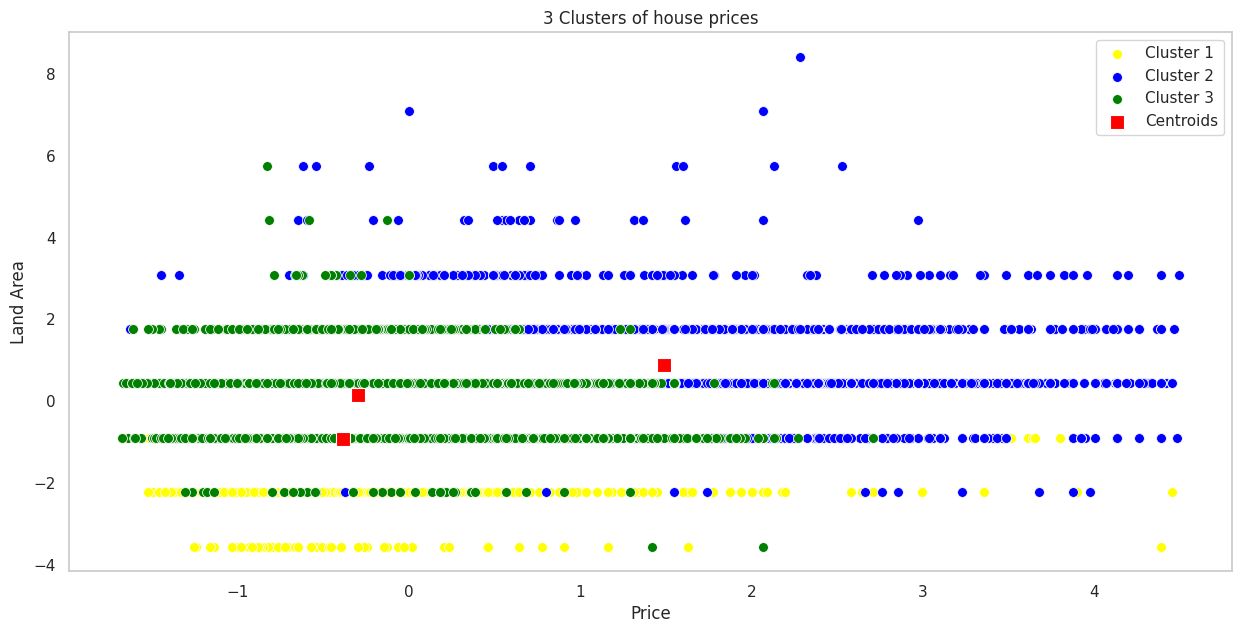

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for cluster of size 3
plt.figure(figsize=(15, 7))
sns.scatterplot(x=df_scaled[pred_3 == 0][:, 0], y=df_scaled[pred_3 == 0][:, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=df_scaled[pred_3 == 1][:, 0], y=df_scaled[pred_3 == 1][:, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=df_scaled[pred_3 == 2][:, 0], y=df_scaled[pred_3 == 2][:, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=centroid_3[:, 0], y=centroid_3[:, 1], color='red', label='Centroids', s=100, marker=',')
plt.grid(False)

plt.xlabel('Price')
plt.ylabel('Land Area')
plt.title('3 Clusters of house prices')
plt.legend()
plt.show()



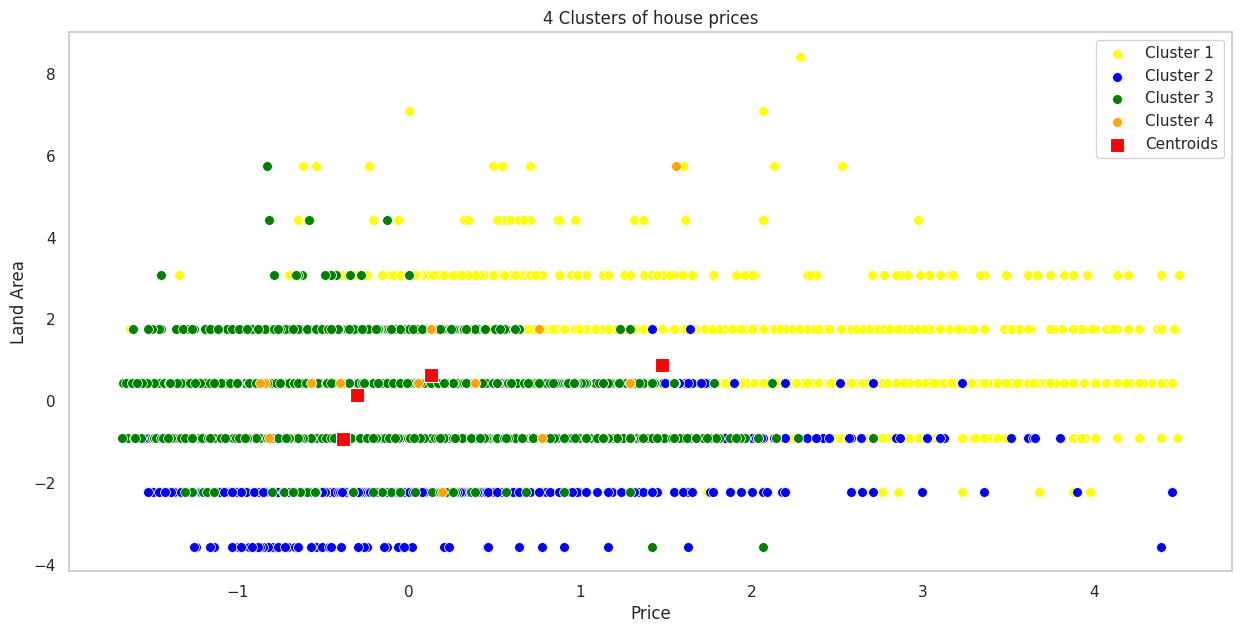

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for cluster of size 4
plt.figure(figsize=(15, 7))
sns.scatterplot(x=df_scaled[pred_4 == 0][:, 0], y=df_scaled[pred_4 == 0][:, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=df_scaled[pred_4 == 1][:, 0], y=df_scaled[pred_4 == 1][:, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=df_scaled[pred_4 == 2][:, 0], y=df_scaled[pred_4 == 2][:, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=df_scaled[pred_4 == 3][:, 0], y=df_scaled[pred_4 == 3][:, 1], color='orange', label='Cluster 4', s=50)
sns.scatterplot(x=centroid_4[:, 0], y=centroid_4[:, 1], color='red', label='Centroids', s=100, marker=',')
plt.grid(False)

plt.xlabel('Price')
plt.ylabel('Land Area')
plt.title('4 Clusters of house prices')
plt.legend()
plt.show()


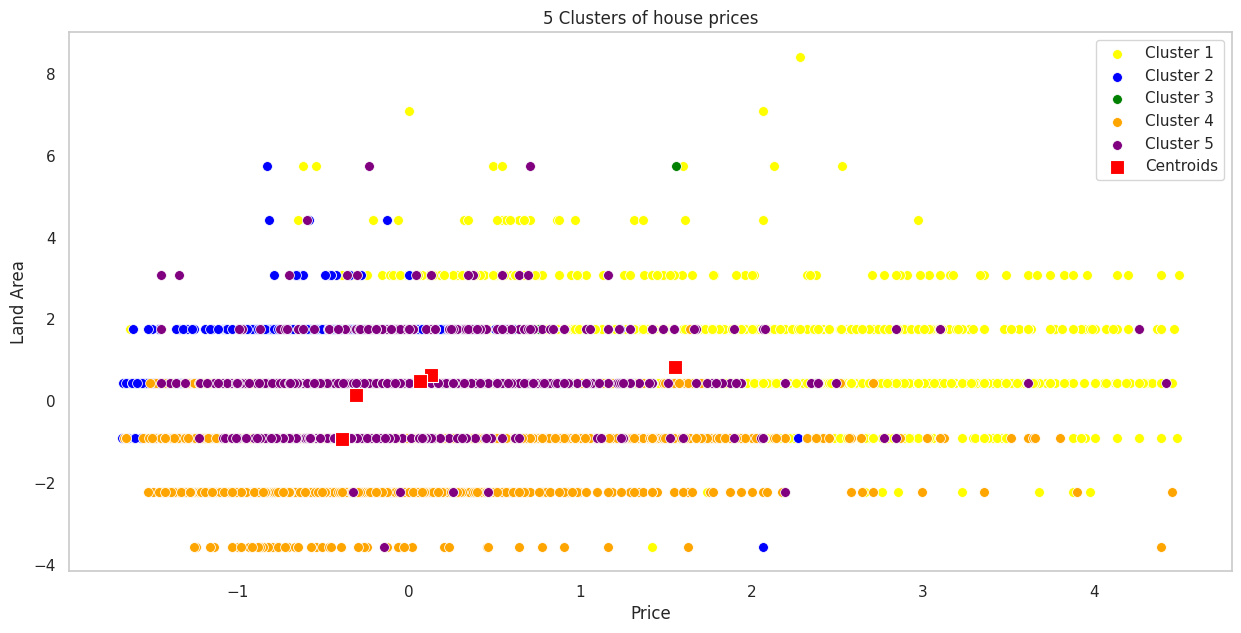

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for cluster of size 5
plt.figure(figsize=(15, 7))
sns.scatterplot(x=df_scaled[pred_5 == 0][:, 0], y=df_scaled[pred_5 == 0][:, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=df_scaled[pred_5 == 1][:, 0], y=df_scaled[pred_5 == 1][:, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=df_scaled[pred_5 == 2][:, 0], y=df_scaled[pred_5 == 2][:, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=df_scaled[pred_5 == 3][:, 0], y=df_scaled[pred_5 == 3][:, 1], color='orange', label='Cluster 4', s=50)
sns.scatterplot(x=df_scaled[pred_5 == 4][:, 0], y=df_scaled[pred_5 == 4][:, 1], color='purple', label='Cluster 5', s=50)
sns.scatterplot(x=centroid_5[:, 0], y=centroid_5[:, 1], color='red', label='Centroids', s=100, marker=',')
plt.grid(False)

plt.xlabel('Price')
plt.ylabel('Land Area')
plt.title('5 Clusters of house prices')
plt.legend()
plt.show()


# **Splitting trainiing and testing data**

## x: This is your feature matrix (independent variables).
## y: This is your target variable (dependent variable).

In [55]:
#defining x and y variables
import numpy as np
x=np.asarray(df_perth0[['BEDROOMS', 'BATHROOMS', 'GARAGE','LAND_AREA', 'FLOOR_AREA', 'DATE_SOLD','BUILD_YEAR']])
x[0:5]

array([[3, 2, 2.0, 351, 139, '02-2019\r', 2013.0],
       [3, 1, 1.0, 719, 86, '06-2015\r', 1979.0],
       [3, 2, 8.0, 552, 126, '10-2019\r', 1999.0],
       [3, 2, 2.0, 398, 158, '11-2018\r', 2003.0],
       [4, 2, 4.0, 704, 247, '07-2019\r', 2002.0]], dtype=object)

In [56]:
y=np.asarray(df_perth0['PRICE'])
y[0:5]

array([365000, 287000, 685000, 367500, 535000])

print('Train set', x_train.shape, y_train.shape): This line prints the shape (number of rows and columns) of the training set (features and target).

print('Test set', x_test.shape, y_test.shape): This line prints the shape (number of rows and columns) of the testing set (features and target).

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=4)#20% and 80% for testing and training respecivly
# This ensures that if you run the code multiple times with the same seed (4 in this case), you will get the same split each time. It's useful for reproducibility.
print('Train set',x_train.shape,y_train.shape)
print('Test set',x_test.shape,y_test.shape)

Train set (15366, 7) (15366,)
Test set (3842, 7) (3842,)
